## Game of Life Rules

1. Any live cell with fewer that two live neighbors dies, as if by underpopulation
2. Any live cell with two or three neighbors lives on to the next generation
3. Any live cell with more than three live neighbors dies, as if by overpopulation
4. Any dead cell with exactly three live nieghbors becomes a live cell, as if by roproduction

### TO DO
    * Setup grid
    * Create rules as functions, make sure they read all cells at the same time
    * Save images per step
    * Create an animation out of saved images

In [1]:
# Grid setup of the system
N = 100
grid = rand(0:1,N,N)

100×100 Matrix{Int64}:
 1  0  1  0  0  1  1  1  1  1  1  0  0  …  0  0  1  1  1  1  1  1  0  0  0  1
 0  0  1  0  0  0  0  1  0  0  0  1  1     1  1  1  1  0  1  0  1  1  0  0  1
 0  1  0  0  1  1  1  1  1  0  0  0  1     1  1  1  0  1  0  0  1  0  0  1  0
 0  0  1  0  0  1  1  0  0  0  1  1  0     1  0  0  0  1  1  1  0  0  1  1  1
 1  1  1  0  0  0  0  0  1  1  0  0  1     0  1  1  1  0  0  1  0  0  1  1  0
 0  1  0  0  1  1  1  0  1  1  0  1  1  …  0  1  1  1  1  1  1  1  1  0  0  1
 0  1  1  0  0  0  1  1  0  0  1  1  0     0  0  0  0  1  1  0  0  0  1  0  0
 1  1  0  0  1  0  0  0  0  1  0  0  0     0  0  1  0  0  1  0  0  0  1  0  0
 1  1  1  0  1  0  1  1  0  0  0  0  1     1  0  1  0  0  0  1  0  1  0  1  1
 0  0  0  0  1  1  0  0  1  1  0  0  1     1  1  0  1  0  0  1  1  0  0  0  1
 0  0  1  0  0  1  0  1  0  1  1  0  1  …  1  1  0  0  1  1  1  1  0  0  1  0
 0  1  0  0  1  0  1  0  0  0  1  1  0     0  0  1  0  1  1  1  1  1  1  1  1
 0  0  0  1  0  1  0  1  1  0  1  1  0   

In [2]:
function neighborSum(xcoord::Int64,ycoord::Int64,oGrid::Matrix{Int64})
    right = xcoord + 1
    if right > N
        right = 1
    end
    left = xcoord - 1
    if left === 0
        left = N
    end
    up = ycoord + 1
    if up > N
        up = 1
    end
    down = ycoord - 1
    if down === 0
        down = N
    end
    return oGrid[right,ycoord] + oGrid[left,ycoord] + oGrid[xcoord,up] + oGrid[xcoord,down] + oGrid[right,up] + oGrid[right,down] + oGrid[left,up] + oGrid[left,down]
end

neighborSum (generic function with 1 method)

In [3]:
nextGrid = zeros(Int64, N,N);

In [4]:
steps = 100
store = [zeros(Int64, N,N) for _ in 1:steps];
store[1] = grid;

In [5]:
function nextStep(oGrid::Matrix{Int64}, nGrid::Matrix{Int64})
    for i = 1:N
        for j = 1:N
            check = neighborSum(i,j,oGrid)
            if oGrid[i,j] === 1
                if check < 2 || check > 3
                    nGrid[i,j] = 0
                end
                if check === 2 || check === 3
                    nGrid[i,j] = 1
                end
            end
            if oGrid[i,j] === 0
                if check === 3
                    nGrid[i,j] = 1
                end
            end
        end
    end
end

nextStep (generic function with 1 method)

In [6]:
for k in 1:(steps - 1)
    nextStep(store[k],store[k+1])
end

In [7]:
store;

In [8]:
# using Plots
# heatmap(grid,
#     yflip=true,
#     size=(400,370))

In [9]:
# heatmap(nextGrid,
#     yflip=true,
#     size=(400,370))

┌ Info: Saved animation to 
│   fn = C:\Users\Matt\Documents\Acads\AY 21-22\215\Physics-215\anim.gif
└ @ Plots C:\Users\Matt\.julia\packages\Plots\yfzIY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\Matt\\Documents\\Acads\\AY 21-22\\215\\Physics-215\\anim.gif")
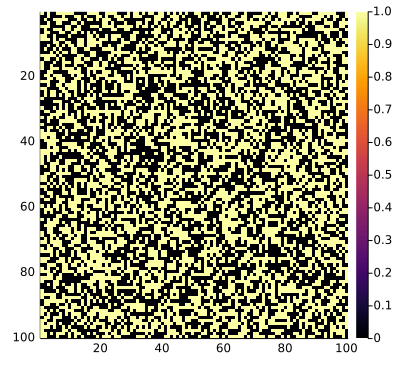

In [10]:
using Plots
anim = @animate for i in store
    heatmap(i,
        yflip=true,
        size=(400,370))
end
gif(anim, "anim.gif", fps = 5)